In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from pylab import rcParams
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
####loading the data####
data=np.loadtxt('predicate-matrix-continuous.txt')
names=np.genfromtxt('classes.txt', dtype=None, names=['Animal ID','Animal Name'],delimiter='\t')

####Running KMeans with 10 clusters####
k_means_clust=KMeans(n_clusters=10).fit(data)
k_means_clust.labels_

####Listing the animals within each clusters####
clusters={}
for i in set(k_means_clust.labels_):
    clusters[i]=[animal_name[1]for animal_name in names[np.where(k_means_clust.labels_==i)]]
clusters

{0: ['spider+monkey', 'gorilla', 'chimpanzee'],
 1: ['killer+whale',
  'blue+whale',
  'humpback+whale',
  'seal',
  'otter',
  'walrus',
  'dolphin'],
 2: ['fox', 'bat', 'wolf', 'rat', 'weasel', 'bobcat'],
 3: ['hippopotamus',
  'elephant',
  'ox',
  'sheep',
  'rhinoceros',
  'buffalo',
  'giant+panda',
  'pig',
  'cow'],
 4: ['antelope', 'horse', 'moose', 'giraffe', 'zebra', 'deer'],
 5: ['tiger', 'leopard', 'lion'],
 6: ['dalmatian',
  'persian+cat',
  'german+shepherd',
  'siamese+cat',
  'chihuahua',
  'collie'],
 7: ['skunk', 'raccoon'],
 8: ['beaver', 'mole', 'hamster', 'squirrel', 'rabbit', 'mouse'],
 9: ['grizzly+bear', 'polar+bear']}

The clustering is not completely accurate but it makes sense as the animals with the same characteristics are still within the same approximate clusters. For example cluster 3 includes **the family of monkeys such as spider monkey, gorilla, chimpanzee,...l**. Also cluster 9 includes the **family of bears such as grizzly bear and polar bear**. We can see same pattern of closed-family groups n other clusters. So it seems that the top 10 most significant features (with highest variance) have preserved most of the valuable data which can be used for accurate clustering. 

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'b',
  'b'],
 'dcoord': [[0.0, 141.96461213978645, 141.96461213978645, 0.0],
  [0.0, 166.85374383972729, 166.85374383972729, 141.96461213978645],
  [0.0, 129.1297622548729, 129.1297622548729, 0.0],
  [0.0, 165.17636211032135, 165.17636211032135, 0.0],
  [129.1297622548729,
   184.81048603907729,
   184.81048603907729,
   165.17636211032135],
  [166.85374383972729,
   261.57646828322265,
   261.57646828322265,
   184.81048603907729],
  [0.0, 133.45206405297748, 133.45206405297748, 0.0],
  [0.0, 126.38570449224072, 126.38570449224072, 0.0],
  [0.0, 153.7480166809749, 153.7480166809749, 126.38570449224072],
  [133.45206405297748,
   181.1466157196061

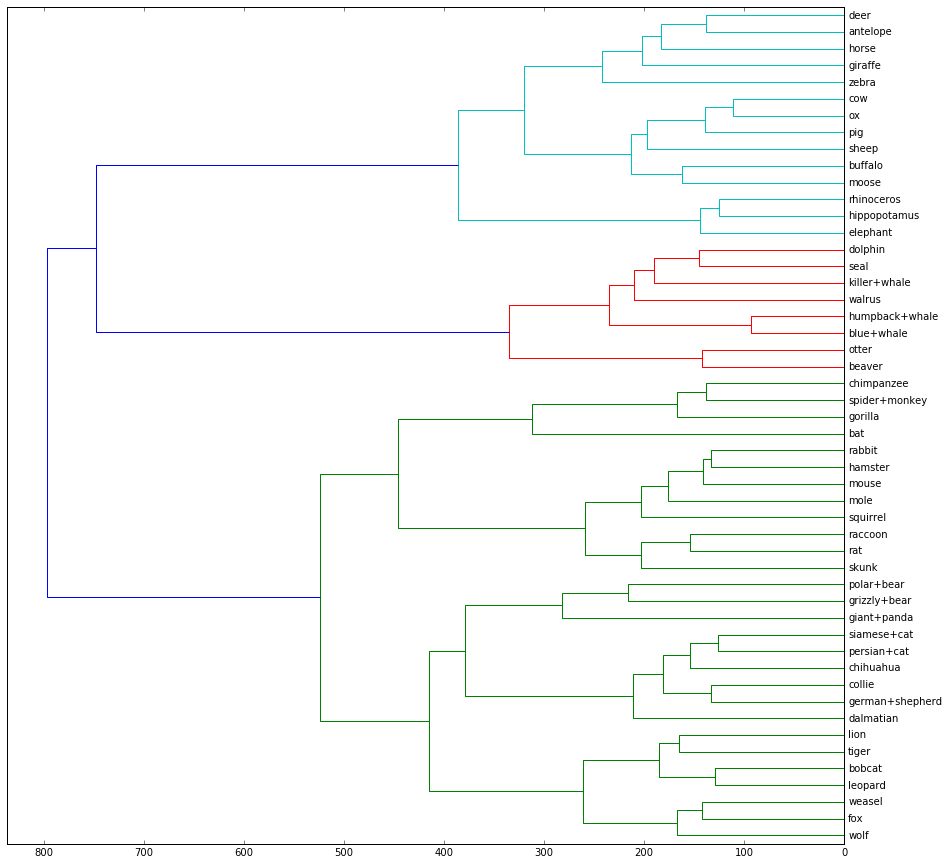

In [18]:
####Using linkage with ward's distance method to hierarchically cluster the animals####
linkage_cluster = linkage(data, method='ward', metric='euclidean')
rcParams['figure.figsize'] = 15, 15
dendrogram(linkage_cluster, orientation='right', labels=[lab[1] for lab in names])

The clustering using linkage clustering looks very accurate even at the lowest level as the similar animals are very closely clustered.